In [72]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
EPOCH = 1
BATCH_SIZE = 50
LR = 0.001
DOWNLOAD_MNIST = True

In [75]:
train_data = torchvision.datasets.MNIST(root = "./data/",
                                        transform = transforms.ToTensor(),
                            train = True,)

In [76]:
print(train_data.train_data.size())
print(train_data.train_labels.size())

torch.Size([60000, 28, 28])
torch.Size([60000])


Text(0.5,1,'5')

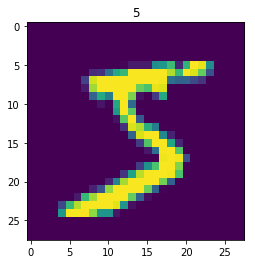

In [77]:
plt.imshow(train_data.train_data[0].numpy())
plt.title(train_data.train_labels[0].item())

In [78]:
train_loader = Data.DataLoader(train_data, BATCH_SIZE, False)

In [79]:
test_data = torchvision.datasets.MNIST(root='./data/',train=False)
test_x = Variable(torch.unsqueeze(test_data.test_data, dim=1)).type(torch.FloatTensor)[:2000]/255
test_y = test_data.test_labels[:2000]

In [80]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )
        self.conv2 = nn.Sequential(nn.Conv2d(16,32,5,1,2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.out = nn.Linear(32*7*7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x     

In [81]:
cnn = CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [82]:
optimizer = torch.optim.Adam(cnn.parameters(), lr = LR)
loss_func = nn.CrossEntropyLoss()

In [83]:
for epoch in range(EPOCH):
    for step, (x,y) in enumerate(train_loader):
        b_x = Variable(x)
        b_y = Variable(y)
        
        output = cnn(b_x)[0]
        loss = loss_func(output, b_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if step % 100 == 0:
            test_output, last_layer = cnn(test_x)
            pred_y = torch.max(test_output, 1)[1].data.squeeze()
            acc = (pred_y == test_y).sum().item()/float(test_y.size(0))
            print(epoch, ' ', loss.data[0], ' ', acc)
        

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:16: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  app.launch_new_instance()


0   tensor(2.3008)   0.137
0   tensor(0.3618)   0.8725
0   tensor(0.2729)   0.8895
0   tensor(0.1024)   0.935
0   tensor(0.3273)   0.9585
0   tensor(0.0449)   0.9595
0   tensor(0.2059)   0.9645
0   tensor(0.0308)   0.964
0   tensor(0.1054)   0.967
0   tensor(0.0518)   0.967
0   tensor(0.0204)   0.9715
0   tensor(0.0311)   0.9745


In [84]:
test_output, last_layer = cnn(test_x)

In [102]:
test_output.max(1)[1].squeeze()

tensor([7, 2, 1,  ..., 3, 9, 5])